# **Overview:**  

This data analysis project for an e-commerce company, is presented as a part of my Kaggle portfolio. It encapsulates a holistic approach towards understanding customer behavior, identifying churn predictors, and drawing strategic insights for the company's growth and sustainability. The project is grounded in both economic and commercial perspectives, providing actionable recommendations based on data-driven insights.

# **Project Structure:**  

1. [**Exploratory Data Analysis (EDA):**](#Exploratory-Data-Analysis)

- **Data Cleaning:** Addressing missing values, outliers, and inconsistencies to ensure the quality of the dataset.
- **Data Processing:** Transforming and structuring the data to facilitate effective analysis.

2. [**Decoding Customer Patterns:**](#Decoding-Customer-Patterns)

- **Variable Relationships:** Investigating correlations and interactions between key variables.
- **Behavioral Insights:** Unveiling patterns in customer behavior that influence purchasing decisions and loyalty, using both statistical and visual tools.

3. [**Churn Prediction Models:**](#Churn-Prediction-Models)

- **[Manual](#Manual-Model) vs. [Automatic Model](#Automatic-Model) Comparison:** Evaluating the performance of manually tuned models against automated machine learning models in predicting customer churn.
- **Model Selection:** Criteria include accuracy, precision, recall, and economic feasibility for the company.

4. [**Conclusions:**](#Conclusions)  

- **Summary of Findings:** Highlighting the key insights and their implications for the e-commerce company.
- **Future Directions:** Suggesting areas for further research and continuous improvement in customer analytics.

# **Objective:**

The primary goal of this project is to provide the e-commerce company with deep insights into customer behavior, predictive tools for identifying potential churn, and strategic recommendations to improve customer retention and overall profitability. It pretends to be more than just a showcase of technical skills; it represents a practical application of data analytics in shaping strategic business decisions and guiding policies for companies.

# **Limitations:**  

This project involves analysis and modeling of e-commerce data, undertaken without detailed contextual understanding of the data collection process or units of measurement for certain variables. While all outliers have been assumed as extreme values rather than errors, this assumption may not accurately reflect the true nature of the data. A preprocessing pipeline has been implemented to robustly handle different data types and address imbalances in the machine learning models. However, readers should be aware that these approaches, while comprehensive, may not fully account for underlying complexities or specific characteristics of the dataset. Consequently, the findings and models presented should be interpreted considering these limitations.

In [1]:
import sklearn
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Load file 
import pandas as pd
data = pd.read_excel("/kaggle/input/ecommerce-customer-churn-analysis-and-prediction/E Commerce Dataset.xlsx", sheet_name=1)

In [3]:
# Head 
data.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60



### **Exploratory Data Analysis**


In [4]:
# Dimension 
dim = data.shape
dim

(5630, 20)

In [5]:
# List of variables 
var_list = list(data.columns)
var_list

['CustomerID',
 'Churn',
 'Tenure',
 'PreferredLoginDevice',
 'CityTier',
 'WarehouseToHome',
 'PreferredPaymentMode',
 'Gender',
 'HourSpendOnApp',
 'NumberOfDeviceRegistered',
 'PreferedOrderCat',
 'SatisfactionScore',
 'MaritalStatus',
 'NumberOfAddress',
 'Complain',
 'OrderAmountHikeFromlastYear',
 'CouponUsed',
 'OrderCount',
 'DaySinceLastOrder',
 'CashbackAmount']

In [6]:
# Description of variables 
basic_st = data.describe()
basic_st

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


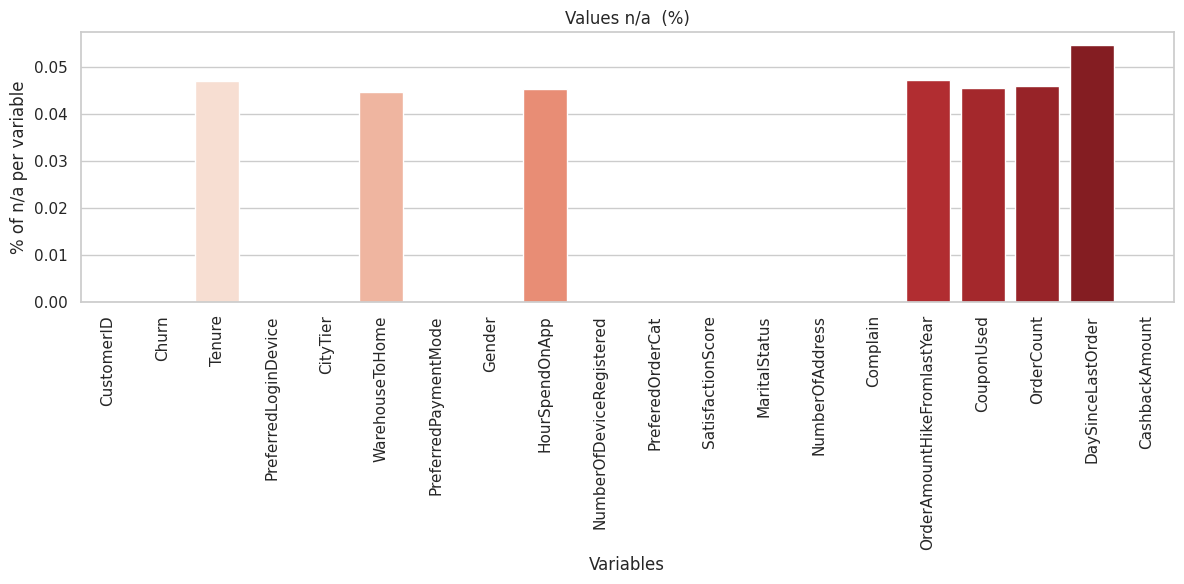

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64


In [7]:
# Nulls and n/a check 

n_a = data.isna().sum()

# Seaborn style
sns.set(style="whitegrid")

# Barplot representing the n/a values (%)
plt.figure(figsize=(12, 6))
sns.barplot(x=n_a.index, y=n_a/5630, palette="Reds")
plt.title('Values n/a  (%)')
plt.xlabel('Variables')
plt.ylabel('% of n/a per variable')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Numeric values
print(n_a)

The percentage of missing and null values is low, so none of the variables will be eliminated for this reason. Missing values will be imputed by mode.

In [8]:
# Imputation by mode: 

# "DaySinceLastOrder"
m_1 = data['DaySinceLastOrder'].mode().astype('int64')[0]

# "OrderAmountHikeFromlastYear"
m_2 = data['OrderAmountHikeFromlastYear'].mode().astype('int64')[0]

# "Tenure"
m_3 = data['Tenure'].mode().astype('int64')[0]

# "OrderCount"
m_4 = data['OrderCount'].mode().astype('int64')[0]

# "CouponUsed"
m_5 = data['CouponUsed'].mode().astype('int64')[0]

# "WarehouseToHome" 
m_6 = data['WarehouseToHome'].mode().astype('int64')[0]

# "HourSpendOnApp"
m_7 = data['HourSpendOnApp'].mode().astype('int64')[0]


data['DaySinceLastOrder'].fillna(m_1, inplace=True)
data['OrderAmountHikeFromlastYear'].fillna(m_2, inplace=True)
data['Tenure'].fillna(m_3, inplace=True)
data['OrderCount'].fillna(m_4, inplace=True)
data['CouponUsed'].fillna(m_5, inplace=True)
data['WarehouseToHome'].fillna(m_6, inplace=True)
data['HourSpendOnApp'].fillna(m_7, inplace=True)

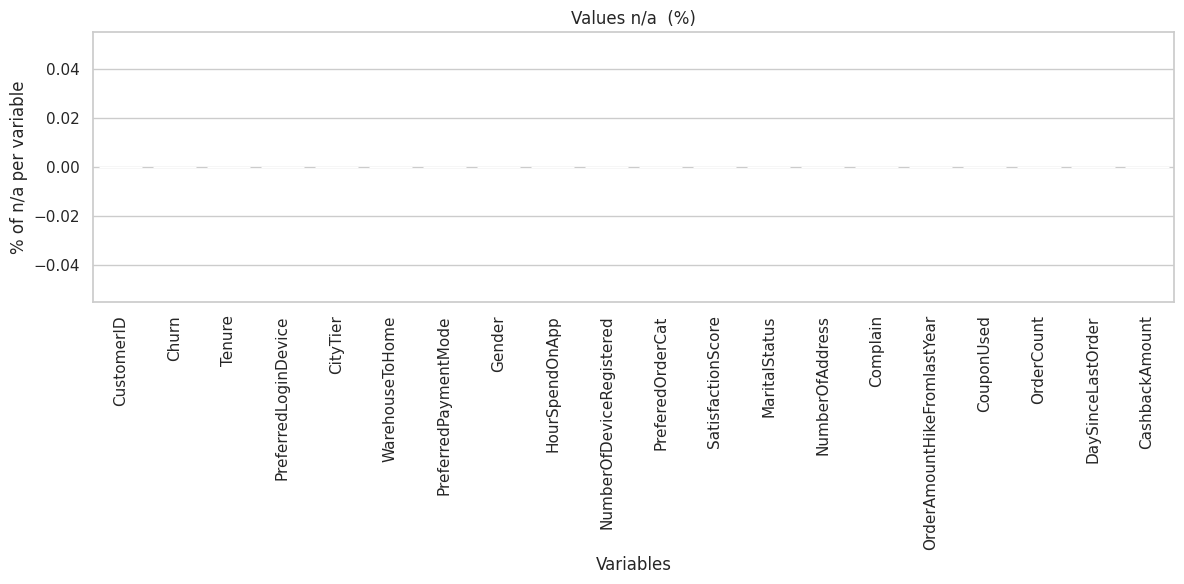

In [9]:
# Checking the changes applied
n_a = data.isna().sum()

# Seaborn style
sns.set(style="whitegrid")

# Barplot representing the n/a values (%)
plt.figure(figsize=(12, 6))
sns.barplot(x=n_a.index, y=n_a/5630, palette="Reds")
plt.title('Values n/a  (%)')
plt.xlabel('Variables')
plt.ylabel('% of n/a per variable')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [10]:
# Simplification of variable names avoiding special characters

old_variables = ["CustomerID", "Churn", "Tenure", "PreferredLoginDevice", "CityTier", 
"WarehouseToHome", "PreferredPaymentMode", "Gender", "HourSpendOnApp", 
"NumberOfDeviceRegistered", "PreferedOrderCat", "SatisfactionScore", 
"MaritalStatus", "NumberOfAddress", "Complain", "OrderAmountHikeFromlastYear", 
"CouponUsed", "OrderCount", "DaySinceLastOrder", "CashbackAmount"]

new_variables = ["CustomerID", "Churn", "Tenure", "LoginDevice", "CityTier", 
"WarehouseToHome", "PaymentMode", "Gender", "HoursOnApp", 
"DevicesRegistered", "MainOrderCat", "SatisfactionScore", 
"MaritalStatus", "NumberOfAddress", "Complain", "OrderAmountHikeFromlastYear", 
"CouponUsed", "OrderCount", "DaySinceLastOrder", "CashbackAmount"]

rename_dict = dict(zip(old_variables, new_variables))
data.rename(columns=rename_dict, inplace=True)

In [11]:
# Categorical and numerical variables

var_cat = data.select_dtypes(include=['category', 'object']).columns.tolist()
print(var_cat)
print('----------------------------------')
var_num = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(var_num)

['LoginDevice', 'PaymentMode', 'Gender', 'MainOrderCat', 'MaritalStatus']
----------------------------------
['CustomerID', 'Churn', 'Tenure', 'CityTier', 'WarehouseToHome', 'HoursOnApp', 'DevicesRegistered', 'SatisfactionScore', 'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']


In [12]:
# Levels of categorical variables

# Dictionary to store the level counts of each categorical column
levels_per_column = {}

# Loops through categorical columns, counts unique levels, and stores the number in the dictionary.
for column in var_cat:
    levels = data[column].nunique()
    levels_per_column[column] = levels

# Prints the results 
lev = []
for column, levels in levels_per_column.items():
    print(f"Column '{column}' has {levels} unique levels.")
    lev.append(levels)

Column 'LoginDevice' has 3 unique levels.
Column 'PaymentMode' has 7 unique levels.
Column 'Gender' has 2 unique levels.
Column 'MainOrderCat' has 6 unique levels.
Column 'MaritalStatus' has 3 unique levels.


In [13]:
# Prints each category 
for column in var_cat:
    levels_2 = data[column].unique()
    print(levels_2)

['Mobile Phone' 'Phone' 'Computer']
['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card']
['Female' 'Male']
['Laptop & Accessory' 'Mobile' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']
['Single' 'Divorced' 'Married']


In [14]:
# Replacing levels to avoid special characters
data['LoginDevice'] = data['LoginDevice'].replace('Mobile Phone', 'Mobile_phone')
data['PaymentMode'] = data['PaymentMode'].replace({
    'Debit Card': 'Debit_card',
    'Cash on Delivery':'Cash_on_delivery',
    'E wallet':'E_wallet',
    'Credit Card':'Credit_card'})
data['MainOrderCat'] = data['MainOrderCat'].replace({
    'Laptop & Accessory': 'Laptop_Accesory',
    'Mobile Phone':'Mobile_phone'})

The "phone" and "mobile phone" levels in the variable "LoginDevice" are assumed to be the same in this context.

In [15]:
data['LoginDevice'] = data['LoginDevice'].replace('Phone', 'Mobile_phone')

The CC and COD categories appear to represent Credit Card and Cash On Delivery (duplicated).

In [16]:
# Replacemnt of categories "PaymentMode"
# Mapping for replacement
replacement_mapping = {
    'CC': 'Credit_card',
    'COD': 'Cash_on_delivery'
}

# Replaces categories in the PaymentMode column
data['PaymentMode'] = data['PaymentMode'].replace(replacement_mapping)

In [17]:
# Checking changes 

for column in var_cat:
    levels_2 = data[column].unique()
    print(levels_2)

['Mobile_phone' 'Computer']
['Debit_card' 'UPI' 'Credit_card' 'Cash_on_delivery' 'E_wallet']
['Female' 'Male']
['Laptop_Accesory' 'Mobile' 'Mobile_phone' 'Others' 'Fashion' 'Grocery']
['Single' 'Divorced' 'Married']


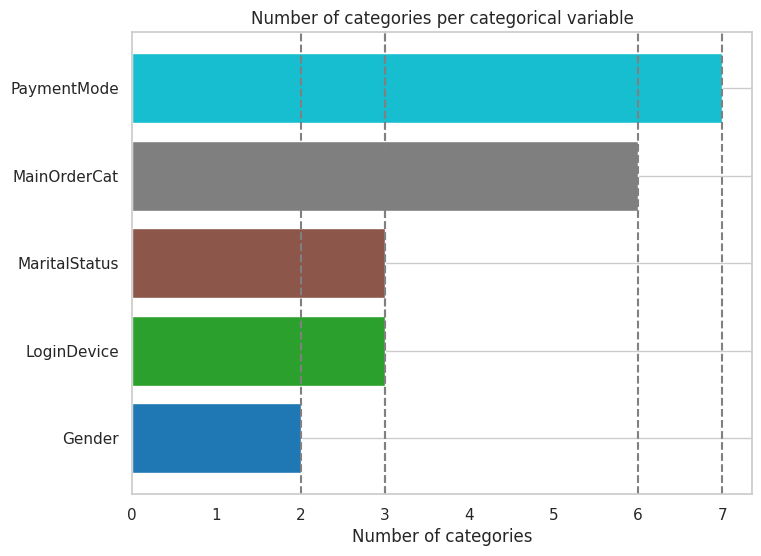

In [18]:
# Sorts categorical variables and associated values
sorted_indices = np.argsort(lev)
var_cat_sorted = [var_cat[i] for i in sorted_indices]
lev_sorted = [lev[i] for i in sorted_indices]

# Creates different colors for each bar
num_bars = len(var_cat)
colors = plt.cm.tab10(np.linspace(0, 1, num_bars))  # Utilizando un colormap para generar colores únicos

# Creates the horizontal barplot
plt.figure(figsize=(8, 6))
bars = plt.barh(var_cat_sorted, lev_sorted, color=colors)
plt.xlabel('Number of categories')
plt.title('Number of categories per categorical variable')
plt.grid(axis='x')  

# Adds vertical dashed lines
for value in lev_sorted:
    plt.axvline(x=value, linestyle='--', color='gray')


# Shows the barplot
print()
plt.show()

In [19]:
# Frequency percentages for each level of categorical variables 

# Total observations 
total_obs = 5630

# Loops through the categorical variables and shows the frequency percentages for each level
for var in var_cat:
    value_counts = data[var].value_counts()
    percentages = (value_counts / total_obs) * 100
    print(f'Frequency percentages of {var}:\n{percentages}\n')

Frequency percentages of LoginDevice:
LoginDevice
Mobile_phone    70.976909
Computer        29.023091
Name: count, dtype: float64

Frequency percentages of PaymentMode:
PaymentMode
Debit_card          41.101243
Credit_card         31.509769
E_wallet            10.905861
Cash_on_delivery     9.129663
UPI                  7.353464
Name: count, dtype: float64

Frequency percentages of Gender:
Gender
Male      60.106572
Female    39.893428
Name: count, dtype: float64

Frequency percentages of MainOrderCat:
MainOrderCat
Laptop_Accesory    36.412078
Mobile_phone       22.575488
Fashion            14.671403
Mobile             14.369449
Grocery             7.282416
Others              4.689165
Name: count, dtype: float64

Frequency percentages of MaritalStatus:
MaritalStatus
Married     53.037300
Single      31.900533
Divorced    15.062167
Name: count, dtype: float64



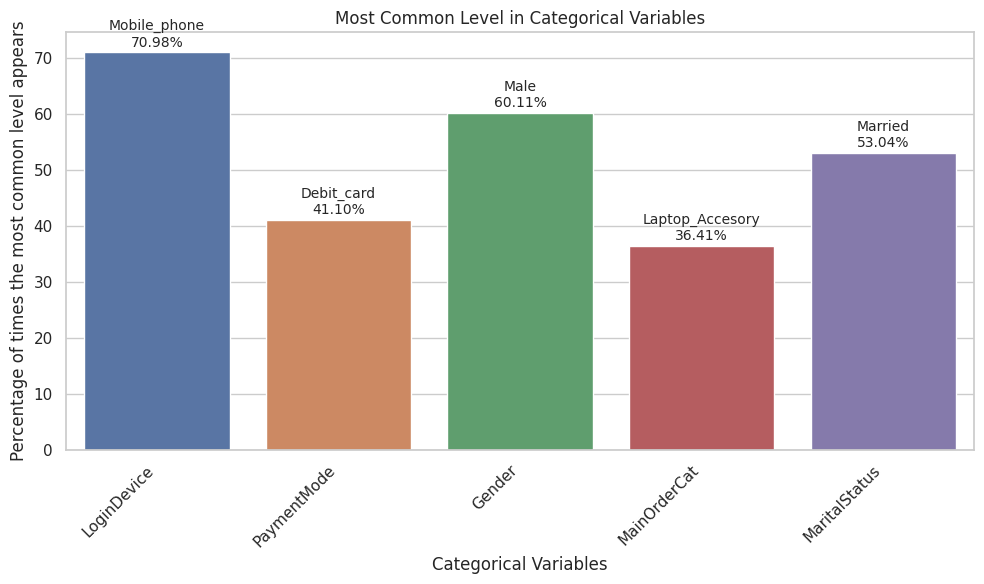

,Variable,Most_Common_Level,Percentage
0,LoginDevice,Mobile_phone,70.976909
1,PaymentMode,Debit_card,41.101243
2,Gender,Male,60.106572
3,MainOrderCat,Laptop_Accesory,36.412078
4,MaritalStatus,Married,53.037300


In [20]:
# Most common level (%)

# List to store results 
comm = []


# Iterates through categorical variables
for var in var_cat:
    # Obtains the series corresponding to the categorical variable and counts the values
    val_count = data[var].value_counts()
    
    # Obtains the most common level (the first value in the largest index)
    most_comm_level = val_count.index[0]
    
    # Calculates the percentage of times the most common level appears
    percentage = (val_count.iloc[0] / len(data)) * 100
    
    # Appends the result to the list
    comm.append({'Variable': var, 'Most_Common_Level': most_comm_level, 'Percentage': percentage})

# Converts the results list to a DataFrame
comm_df = pd.DataFrame(comm)

# Creates a barplot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Variable', y='Percentage', data=comm_df, palette='deep')

# Graphic setup
ax.set(xlabel='Categorical Variables', ylabel='Percentage of times the most common level appears')
plt.title('Most Common Level in Categorical Variables')

# Text description
for i, row in comm_df.iterrows():
    level = row['Most_Common_Level']
    percentage = row['Percentage']
    ax.text(i, percentage + 1, f'{level}\n{percentage:.2f}%', ha='center', fontsize=10)

# Shows the barplot 
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Shows the DataFrame
comm_df

The chart indicates that the majority of users log in using mobile phones and prefer to pay with debit cards. Male users are the most frequent shoppers in this data set. The most popular product category is laptop accessories, and more than half of the customers are married.  
We can infer that this e-commerce company looking to optimize its marketing and user experience should focus on mobile phone users, possibly offering promotions for debit card payments. The company might also consider targeting male customers with marketing campaigns, especially those related to laptop accessories. Finally, given that a significant portion of the customer base is married, the company could tailor some of its marketing strategies to appeal to this demographic, potentially offering deals or products that might interest married couples.

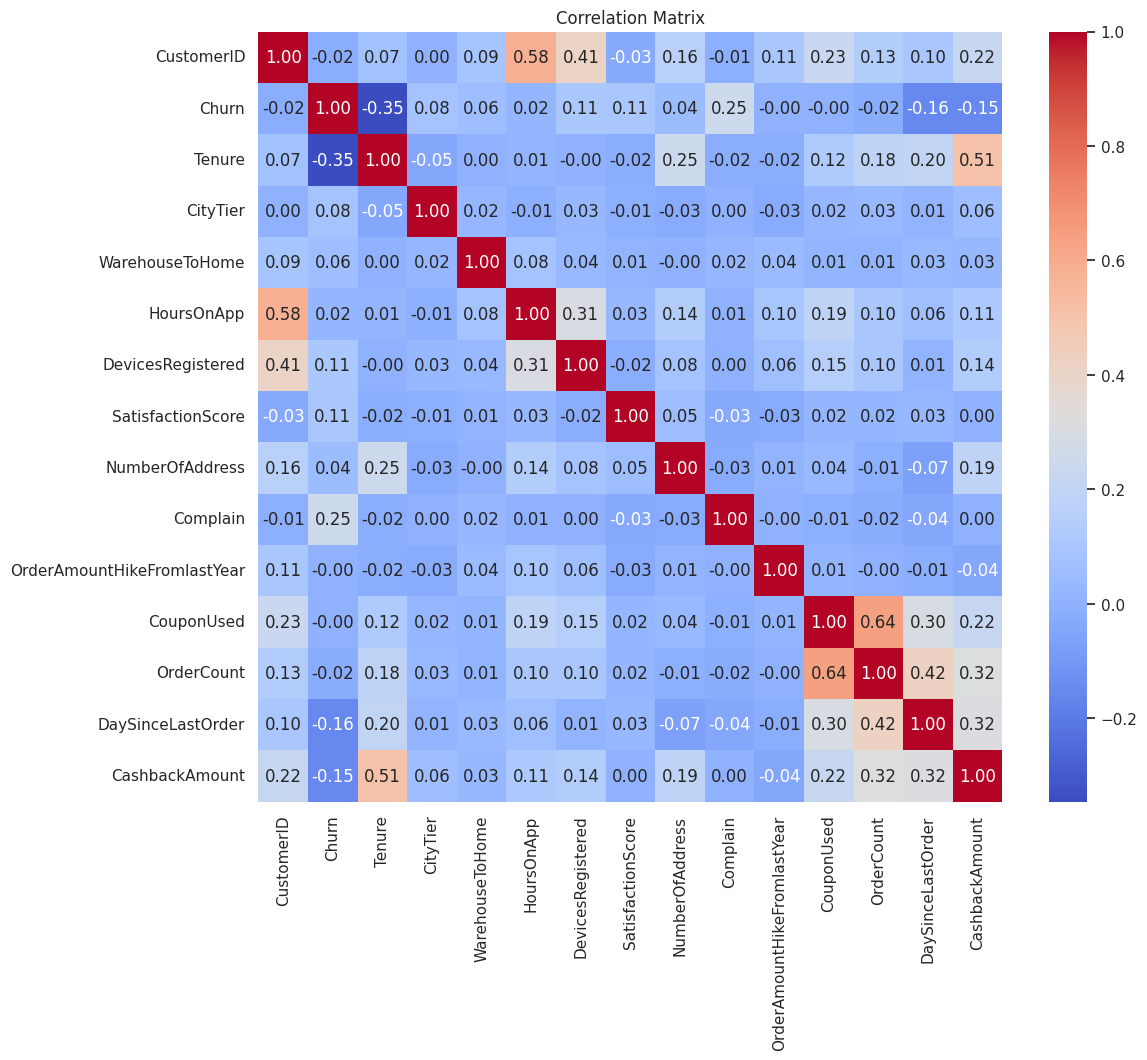

In [21]:
# Correlation Matrix and Heatmap
matrix_cor = data.select_dtypes(include=['int64', 'float64']).corr()
matrix_cor

# Fig size 
plt.figure(figsize=(12, 10))

# Creates a heatmap from the correlation matrix 
sns.heatmap(matrix_cor, annot=True, cmap='coolwarm', fmt=".2f")

# Title
plt.title('Correlation Matrix')

# Shows the heatmap
plt.show()

**Positive Correlation:**  
- HoursOnApp and CustomerID have a correlation of 0.58, suggesting that customers with higher IDs (probably newer clients) spend more time on the app.  
- CouponUsed and OrderCount have a correlation of 0.64, indicating that more coupons are used by customers with a higher number of orders. It suggests that promotions and discounts are effective in increasing purchase frequency.  
- CashbackAmount has a relatively high positive correlation with Churn (0.51), which could imply that customers receiving more cashback might be more likely to churn. This may indicate that while cashback incentives are being utilized, they may not be effective in retaining customers in the long term and could be associated with one-time purchases or customers who are not engaged beyond the transactional benefit. 
  
**Negative Correlation:**
- Churn and Tenure have a correlation of -0.35, indicating that customers with longer tenure are less likely to churn, implying that efforts to keep customers engaged over time could reduce customer turnover.

Many variables show little to no correlation with each other, meaning that there may be no linear relationship or that any relationship is complex and not easily captured by correlation alone. This is an indication that customer retention strategies need to be multifaceted. While promotions may drive sales, they do not necessarily build long-term loyalty.   
At this point in the analysis, the information obtained by the relationship between the numerical variables seems to indicate that it would be beneficial to focus on personalized engagement strategies that increase tenure, as well as to re-evaluate the cashback incentive programs to ensure they are contributing positively to long-term customer loyalty. 

Churn
0    4682
1     948
Name: count, dtype: int64
-----------------------------------
Churn
0    83.16
1    16.84
Name: count, dtype: float64


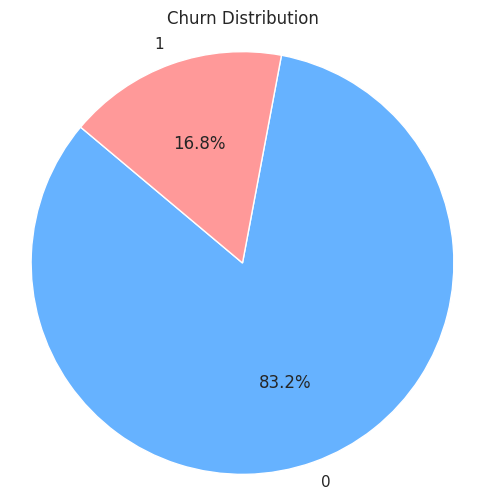

In [22]:
# Target variable analysis 
 
# Number of observations 
target_var = data['Churn'].value_counts()
print(target_var)
print("-----------------------------------")

# Percentage of observations 
percentage = round((target_var/total_obs)*100, 2)
print(percentage)

#Pie chart
colors = ['#66B2FF', '#FF9999']

plt.figure(figsize=(6, 6))
plt.pie(percentage, labels=percentage.index, 
        autopct='%1.1f%%', startangle=140, colors = colors)
plt.title('Churn Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the pie chart
plt.show()

- Base accuracy: 83.16%  
- Baseline failure rate: 16.84%   
The high base accuracy points to an imbalanced class distribution which can mislead the model performance evaluation. 

### Decoding Customer Patterns

**Relationship between the time a customer has been in the organization (Tenure) and the probability of churn:**  
Understanding whether there is a relationship between the length of time a customer has been with the organization and their likelihood of churning can be crucial in identifying whether older customers tend to stay or churn more.

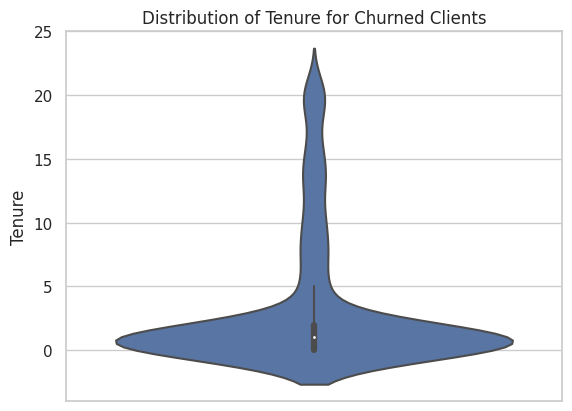

Q1:  0.0
Median:  1.0
Q3:  2.0
IQR:  2.0


In [23]:
# Filters data for Churn=1
churned_data = data[data['Churn'] == 1]

# Violin plot with Seaborn for churned clients
sns.violinplot(data=churned_data, y='Tenure')
# Customizes labels and title
plt.ylabel('Tenure')
plt.title('Distribution of Tenure for Churned Clients')
# Shows the plot
plt.show()

# Calculates the quartiles and Interquartile Range
Q1 = churned_data['Tenure'].quantile(0.25)
median = churned_data['Tenure'].quantile(0.5)
Q3 = churned_data['Tenure'].quantile(0.75)
IQR = Q3 - Q1

print('Q1: ',Q1)
print('Median: ',median)
print('Q3: ',Q3)
print('IQR: ',IQR)

The distribution of tenure for churned clients is heavily skewed towards a lower tenure, with a median of just 1 time units, meaning that churn is most common among clients with the least tenure. This might be an indicator of underlying issues with the company's product or service. Also, the company may not be recovering the initial customer acquisition costs and may be facing a high opportunity cost by missing opportunities for cross-selling and upselling.   

This analysis suggets the company should focus on the initial phases of the customer lifecycle (especially in the first two time units) to improve retention.

**IMPORTANT!!!**   
The unit of time for client tenure is critical information missing from this analysis. Without this info, the strategic decisions are being made in the dark. It's important to note that this project is a theoretical exercise within a portfolio and does not directly influence any organization's strategic planning. Its purpose is to demonstrate the approach to analysis in a hypothetical scenario.

**Relationship between the preferred login device (PreferredLoginDevice) and the time the customer spends on the app (HourSpendOnApp):**  
Knowing which device a customer prefers to access the service, and how this correlates to the time they spend on the app, can help optimize the user experience for specific devices, which can increase retention and engagement.

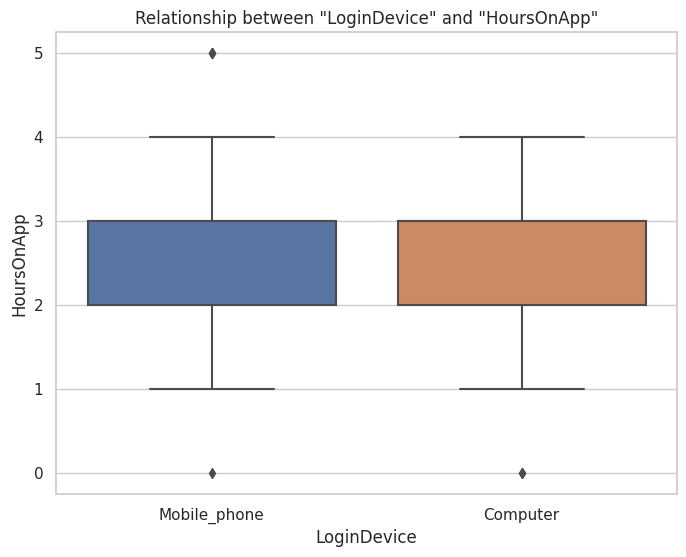

Device: Mobile_phone
Q1: 2.00
Median: 3.00
Q3: 3.00

Device: Computer
Q1: 2.00
Median: 3.00
Q3: 3.00



In [24]:
# Boxplot using Seaborn
plt.figure(figsize=(8, 6))
sns.boxplot(x="LoginDevice", y="HoursOnApp", data=data)
# Customizes labels and title
plt.title('Relationship between "LoginDevice" and "HoursOnApp"')
plt.xlabel("LoginDevice")
plt.ylabel("HoursOnApp")
# Shows the plot 
plt.show()


# Empty dictionary to store quartiles for each device
quartiles_dev = {}

# Iterates through unique device categories
for device in data['LoginDevice'].unique():
    # Selects data for the current device
    device_data = data['HoursOnApp'][data['LoginDevice'] == device]
    
    # Calculates the quartiles
    q1 = device_data.quantile(0.25)
    q2 = device_data.quantile(0.5)  
    q3 = device_data.quantile(0.75)
    
    # Stores quartiles in the dictionary
    quartiles_dev[device] = {'Q1': q1, 'Median': q2, 'Q3': q3}

# Prints quartiles for each device
for device, quartiles in quartiles_dev.items():
    print(f"Device: {device}")
    print(f"Q1: {quartiles['Q1']:.2f}")
    print(f"Median: {quartiles['Median']:.2f}")
    print(f"Q3: {quartiles['Q3']:.2f}")
    print()

The app usage seems consistent across mobile phones and computers, suggesting that device type may not be a key factor in designing marketing or user retention strategies. However, a significant number of users spend only 2 hours on the app. There could be opportunities to increase this time through new features or personalized content.

This analysis also shows some outliers. This could be due to a data error, customers who accessed the app only once and logged out immediately, or customers with low engagement. In any case, it is advisable to know if the number of users in this state is relevant, to rule out a hidden problem with the operation of the application.

In [25]:
data_zero = data[data['HoursOnApp']==0]
data_zero['HoursOnApp'].count()

3

It doesn't seem to be a problem with the the app. It isn't a relevant number of users. An error in the data would be even more plausible.

**Relationship between the percentage increases in order from last year (OrderAmountHikeFromlastYear) and the city tier (CityTier)**  

Knowing which city tiers are experiencing higher growth rates can help in strategic planning. The company can decide where to focus its efforts, be it in maintaining the lead in high-growth areas or improving in lower-growth areas.

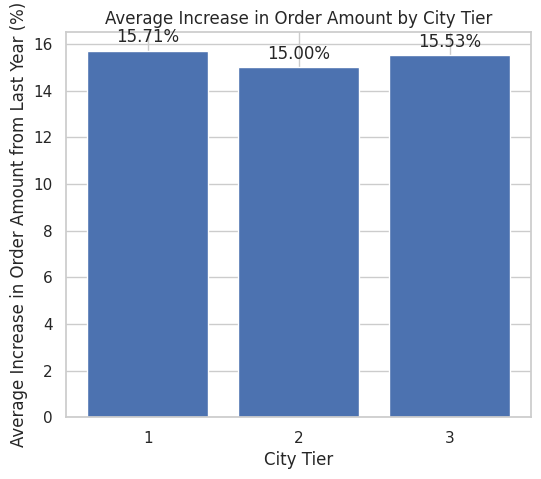

In [26]:
# Groups the data by 'CityTier' and calculates the average increase
avg_increase = data.groupby('CityTier')['OrderAmountHikeFromlastYear'].mean().reset_index()

# Creates a bar plot for the averages
plt.figure(figsize=(6, 5))
bars = plt.bar(avg_increase['CityTier'], avg_increase['OrderAmountHikeFromlastYear'])
plt.xlabel('City Tier')
plt.ylabel('Average Increase in Order Amount from Last Year (%)')
plt.title('Average Increase in Order Amount by City Tier')

# Sets X-axis ticks to show only 1, 2, and 3
plt.xticks([ 1, 2, 3], ['1', '2', '3'])

# Bars with their respective percentages
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.2f}%',  
                 xy=(bar.get_x() + bar.get_width() / 2, height),xytext=(0, 3),  
                 textcoords="offset points",
                 ha='center', va='bottom')

plt.show()

The differences between the tiers are minimal, Indicating a fairly uniform increase across different city tiers. This suggests that the company's market penetration strategies are effective across diverse urban settings. 
Although the data reflects positive growth across all city tiers, the relatively even growth across tiers might also indicate that there is not a significant untapped market in any particular tier, which could suggest that the company is nearing market saturation and might need to innovate or expand to new tiers or markets for further growth.

In general, it seems to be a good indicator. However, to ensure continued growth, the company should consider exploring innovation or expansion into new tiers or markets. This diversification can help the company access new customer segments and maintain its growth trajectory. 

**Relationship between the distance from the warehouse to the customer's home and any complain raised in last month**

The distance between the warehouse and the home could influence the frequency of customer complaints. This information could help optimize logistics or delivery times to improve customer satisfaction and reduce complaints.

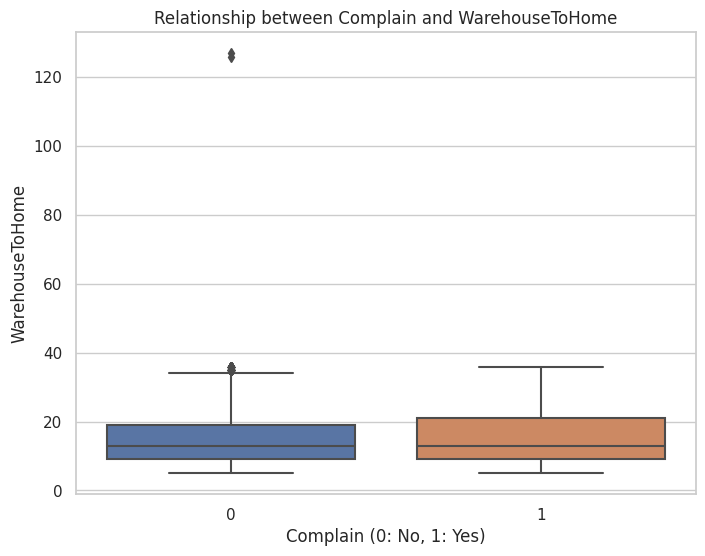

Device: 1
Q1: 9.00
Median: 13.00
Q3: 21.00

Device: 0
Q1: 9.00
Median: 13.00
Q3: 19.00



In [27]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="Complain", y="WarehouseToHome", data=data)
plt.xlabel("Complain (0: No, 1: Yes)")
plt.ylabel("WarehouseToHome")
plt.title("Relationship between Complain and WarehouseToHome")
plt.show()


# Empty dictionary to store quartiles for each device
quartiles_comp = {}

# Iterates through unique device categories
for complain in data['Complain'].unique():
    # Selects data for the current device
    complain_data = data['WarehouseToHome'][data['Complain'] == complain]
    
    # Calculates the quartiles
    q1 = complain_data.quantile(0.25)
    q2 = complain_data.quantile(0.5)  
    q3 = complain_data.quantile(0.75)
    
    # Stores quartiles in the dictionary
    quartiles_comp[complain] = {'Q1': q1, 'Median': q2, 'Q3': q3}

# Prints quartiles for each device
for complain, quart in quartiles_comp.items():
    print(f"Device: {complain}")
    print(f"Q1: {quart['Q1']:.2f}")
    print(f"Median: {quart['Median']:.2f}")
    print(f"Q3: {quart['Q3']:.2f}")
    print()

The median distance to the customer's home is the same for both groups. This similarity in medians suggests that distance to the customer's home may not be the primary driver of complaints.   
The IQR is 12km for customers with complaints and 10km for customers without complaints. This wider IQR  for customers who have complained indicates that customers further from the warehouse are somewhat more likely to complain.  
In summary, this is not a clear-cut predictor.

**Relationship between the satisfactory score of customer on service (SatisfactionScore) and the preferred payment method (PaymentMode).**  

The preferred payment method may be related to customer convenience. Understanding how this affects their level of satisfaction can help adapt and promote more satisfactory payment methods.

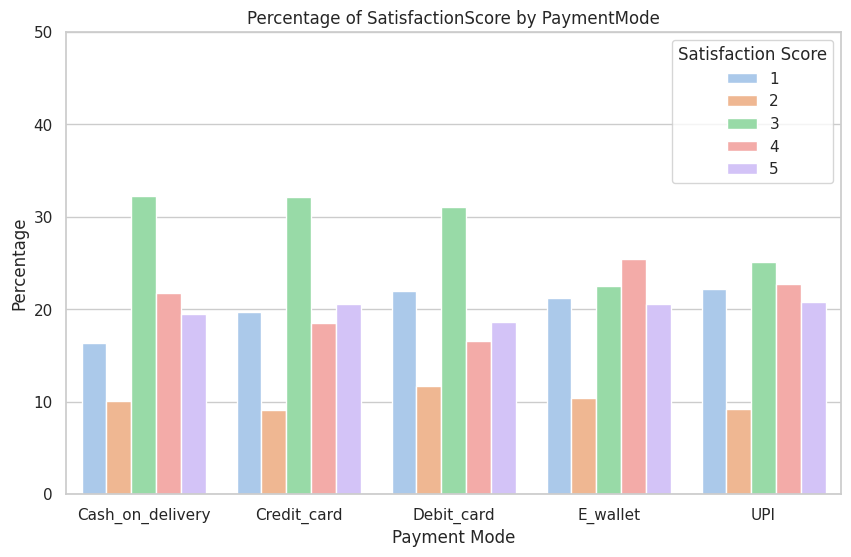

In [28]:
# Percentages for each category
total = len(data)
counts = data.groupby(['PaymentMode', 'SatisfactionScore']).size().unstack()
counts = counts.divide(counts.sum(axis=1), axis=0) * 100

# Reshapes the data for plotting
counts = counts.stack().reset_index(name='Percentage')

# Creates a count plot with percentages
plt.figure(figsize=(10, 6))
sns.barplot(x='PaymentMode', y='Percentage', hue='SatisfactionScore', data=counts, palette='pastel')
plt.title('Percentage of SatisfactionScore by PaymentMode')
plt.xlabel('Payment Mode')
plt.ylabel('Percentage')
plt.legend(title='Satisfaction Score')
plt.ylim(0, 50)  # Set y-axis limits from 0 to 100 for percentages
plt.show()


To check if the satisfaction score is somehow related with the payment mode, a Analysis of Variance (ANOVA) test will be conducted. It will test the null hypothesis that the means of the satisfaction scores are the same across different payment modes, indicating no relationship between the type of payment mode and satisfaction scores.

In [29]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# Fit the model
model = ols('SatisfactionScore ~ C(PaymentMode)', data=data).fit()

# Perform the ANOVA test
anova_results = anova_lm(model)
anova_results

,df,sum_sq,mean_sq,F,PR(>F)
C(PaymentMode),4.0,29.363281,7.340820,3.861413,0.003892
Residual,5625.0,10693.525529,1.901071,NaN,NaN


The p-value (PR(>F)) for 'PaymentMode' is 0.003892, which is less than 0.05 (a common alpha level for significance). The null hypothesis is rejected. This indicates that there is a statistically significant difference in the SatisfactionScore across different PaymentModes

It's better to reconfigure the satisfaction score into broader categories  ("Low," "Neutral," and "High") since it offers a streamlined approach for analyzing customer feedback and facilitates clearer communication of satisfaction levels within the e-commerce company.

In [30]:
sat_data = data

# Function to unify staisfaction scores "1&2" into "Low", 3 into "Neutral" and "4&5" into "High"
def replace_scores(score):
    if score in [1, 2]:
        return 'Low'
    elif score == 3:
        return 'Neutral'
    elif score in [4, 5]:
        return 'High'
    else:
        return 'Unknown'
    

# Applies the function to the 'SatisfactionScore' column
sat_data['SatisfactionScore'] = [replace_scores(score) for score in sat_data['SatisfactionScore']]

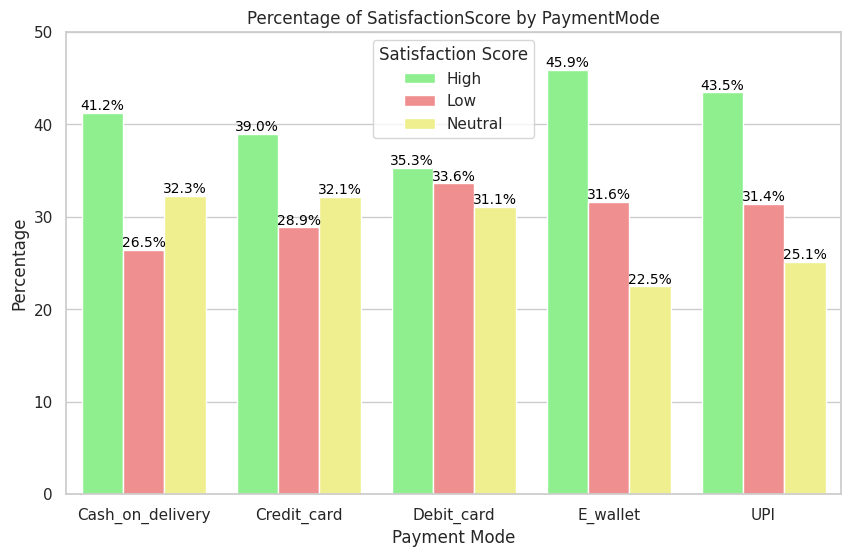

In [31]:
# Custom colors for the categories
custom_palette = {"High": "#7FFF7F", "Low": "#FF7F7F", "Neutral": "#FFFF7F"}

# Percentages for each category
total = len(sat_data)
counts = sat_data.groupby(['PaymentMode', 'SatisfactionScore']).size().unstack()
counts = counts.divide(counts.sum(axis=1), axis=0) * 100

# Reshapes the data for plotting
counts = counts.stack().reset_index(name='Percentage')

# Creates a count plot with percentages
plt.figure(figsize=(10, 6))
sns.barplot(x='PaymentMode', y='Percentage', hue='SatisfactionScore', data=counts, palette=custom_palette)
plt.title('Percentage of SatisfactionScore by PaymentMode')
plt.xlabel('Payment Mode')
plt.ylabel('Percentage')
plt.legend(title='Satisfaction Score')
plt.ylim(0, 50)  # Set y-axis limits from 0 to 100 for percentages

# Annotations (percentage values) to the bars
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{height:.1f}%', 
                       (p.get_x() + p.get_width() / 2, height),
                       ha='center', va='bottom', color='black', size=10)

plt.show()

- **Cash On Delivery:** while there is a significant portion of clientes using COD as payment mode with a high satisfaction, there's also a substantial minority of customers who are not satisfied.  
- **Credit Card:** The relatively high percentage of "Low" satisfaction indicates areas that may need addressing.  
- **Debit Card:** suggests a balanced but varied experience among debit card users.  
- **E-wallet:** users have a clear tendency towards "High" satisfaction.
- **UPI:** Has the highest "High" satisfaction score (43.5%), with "Neutral" (31.4%) and the lowest "Low" satisfaction (25.1%) among all the payment modes. This demonstrates a strong positive reception for UPI.  


This analysis suggests that customers who use UPI and E-wallet as payment methods, have a high satisfaction. To capitalize this, the company should integrate these payment options into their customer acquisition strategies and prioritize them in promotional activities, which could boost their adoption rates. Also, building stronger relationships with UPI and E-wallet providers could be an advantage, as it might result in more favorable terms and collaborative promotional efforts for customer benefits. Furthermore, the company should consider evaluating and possibly revising the pricing strategies or fee structures related to various payment methods. This revision could particularly impact the satisfaction associated with credit and debit card transactions, potentially increasing their favorability among customers.


**Relationship between the satisfactory score of customer on service (SatisfactionScore) and the churn flag  (Churn).**

This analysis can help to understand if there's a direct correlation between satisfaction scores and churn rates. 

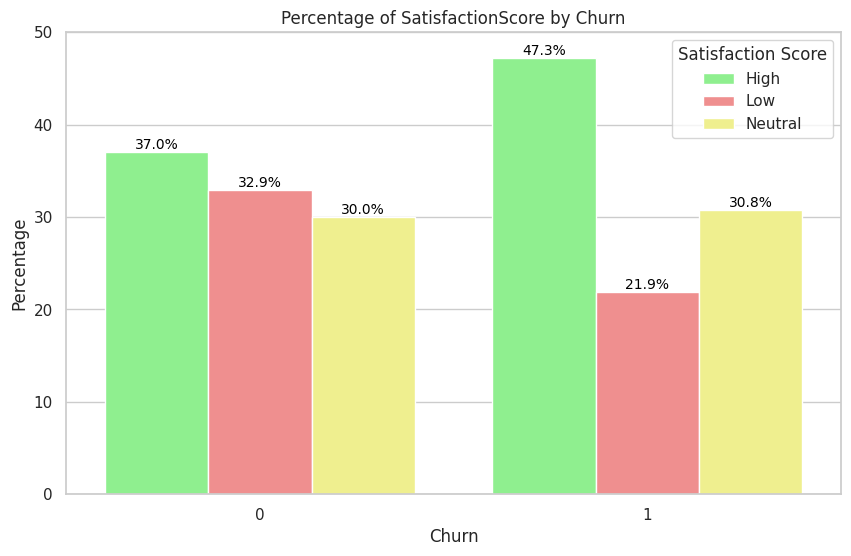

In [32]:
# Percentages for each category
total = len(sat_data)
counts = sat_data.groupby(['Churn', 'SatisfactionScore']).size().unstack()
counts = counts.divide(counts.sum(axis=1), axis=0) * 100

# Reshapes the data for plotting
counts = counts.stack().reset_index(name='Percentage')

# Creates a count plot with percentages
plt.figure(figsize=(10, 6))
sns.barplot(x='Churn', y='Percentage', hue='SatisfactionScore', data=counts, palette=custom_palette)
plt.title('Percentage of SatisfactionScore by Churn')
plt.xlabel('Churn')
plt.ylabel('Percentage')
plt.legend(title='Satisfaction Score')
plt.ylim(0, 50)  # Set y-axis limits from 0 to 100 for percentages

# Annotations (percentage values) to the bars
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{height:.1f}%', 
                       (p.get_x() + p.get_width() / 2, height),
                       ha='center', va='bottom', color='black', size=10)

plt.show()


A  high percentage of customers with high satisfaction scores still churned. This could imply that factors other than customer satisfaction are influencing churn. 

As a suggestion, the company should develop targeted customer retention strategies that address the high churn rate among satisfied customers. This might include loyalty programs, personalized marketing, or new service features. As for the market positioning, it might need to be reevaluated, especially if customers are leaving even when they report being satisfied, indicating that the company's strengths are not enough to retain customers.

**Relationship between marital status (MaritalStatus) and days since last order (DaySinceLastOrder)**  

Marital status could be related to purchasing behavior. Understanding whether there is any relationship between marital status and time since last order could help adjust marketing strategies or specific services for different demographic groups.

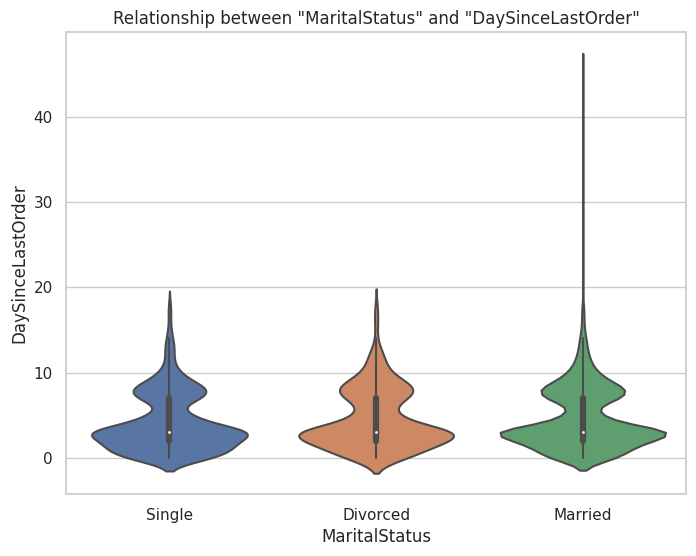

Device: Single
Q1: 2.00
Median: 3.00
Q3: 7.00

Device: Divorced
Q1: 2.00
Median: 3.00
Q3: 7.00

Device: Married
Q1: 2.00
Median: 3.00
Q3: 7.00



In [33]:
# Creating a violin plot using Seaborn
plt.figure(figsize=(8, 6))
sns.violinplot(x="MaritalStatus", y="DaySinceLastOrder", data=data)
plt.title('Relationship between "MaritalStatus" and "DaySinceLastOrder"')
plt.xlabel("MaritalStatus")
plt.ylabel("DaySinceLastOrder")

plt.show()

# Empty dictionary to store quartiles for each marital status
quartiles_status = {}

# Iterates through unique device categories
for status in data['MaritalStatus'].unique():
    # Selects data for the current device
    status_data = data['DaySinceLastOrder'][data['MaritalStatus'] == status]
    
    # Calculates the quartiles
    q1 = status_data.quantile(0.25)
    q2 = status_data.quantile(0.5)  
    q3 = status_data.quantile(0.75)
    
    # Stores quartiles in the dictionary
    quartiles_status[status] = {'Q1': q1, 'Median': q2, 'Q3': q3}

# Prints quartiles for each device
for status, quartiles in quartiles_status.items():
    print(f"Device: {status}")
    print(f"Q1: {quartiles['Q1']:.2f}")
    print(f"Median: {quartiles['Median']:.2f}")
    print(f"Q3: {quartiles['Q3']:.2f}")
    print()

The distributions for "Single", "Divorced", and "Married" categories are very similar. There doesn't seem to be a need to differentiate services or products based on marital status alone, given the similarity in order frequency across the groups.

Overall, the company's strategies for customer engagement and retention seem to be working similarly across different marital statuses, suggesting a generally universal appeal of their services or products.

### **Churn Prediction Models**

### **Manual Model**

In [34]:
# Seed for reproducibility
seed = 9832
# Copy of the DataFrame
data_manual = data

# Target variable and DataFrame
X = data_manual.drop('Churn', axis=1)
y = data_manual['Churn']

In [35]:
import warnings

sns.set_style('darkgrid')
np.set_printoptions(precision=2)
warnings.filterwarnings("ignore")

import sklearn
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer, Binarizer, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, PowerTransformer, RobustScaler
from sklearn.impute import SimpleImputer, KNNImputer

from sklearn.feature_selection import SelectKBest, chi2, RFE
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

from sklearn.model_selection import KFold, ShuffleSplit, LeaveOneOut, StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

In [36]:
# Models to check 

models = []
models.append(('LR', LogisticRegression(random_state=seed)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier(random_state=seed)))
models.append(('NB', GaussianNB()))
models.append(('RFC', RandomForestClassifier(random_state=seed)))
models.append(('SVM', SVC(random_state=seed)))
models.append(('GBC', GradientBoostingClassifier(random_state=seed)))
models.append(('XGB', XGBClassifier(random_state=seed, use_label_encoder=False, eval_metric='logloss')))
models.append(('ADA', AdaBoostClassifier(random_state=seed)))

In [37]:
# Categorical and numerical variables from data_manual
var_cate = [col for col in data_manual.columns if data_manual[col].dtype == 'object']
var_nume = [col for col in data_manual.select_dtypes(include=['int64', 'float64']).columns if col != 'Churn']

print(var_cate)
print('------------')
print(var_nume)

['LoginDevice', 'PaymentMode', 'Gender', 'MainOrderCat', 'SatisfactionScore', 'MaritalStatus']
------------
['CustomerID', 'Tenure', 'CityTier', 'WarehouseToHome', 'HoursOnApp', 'DevicesRegistered', 'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']


In [38]:
results = []
names = []
# ColumnTransformer to apply OneHot encoding to categorical variables and scaling to numeric variables
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), var_nume),
        ('cat', OneHotEncoder(), var_cate)
    ])

for name, model in models:
    # Creates a pipeline with SMOTE and the estimator
    pipeline = ImbPipeline([
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=seed)),
        (name, model)
    ])
    
    # 10-fold cross-validation with stratified sampling
    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
    result = cross_val_score(pipeline, X, y, cv=cv, scoring='roc_auc')
    
    results.append(result)
    names.append(name)

Oversampling (SMOTE(random_state=seed)): Applies the Synthetic Minority Over-sampling Technique (SMOTE) to balance the dataset. SMOTE works by creating synthetic samples from the minority class.  

The metric used to evaluate the models. ROC-AUC (Receiver Operating Characteristic - Area Under Curve) is a performance measurement for classification problems at various thresholds settings. ROC is a probability curve, and AUC represents the degree or measure of separability. 

In [39]:
# Average result of each model 
mean_results = [result.mean() for result in results]

# Creates a dictionary to relate model names to their mean results
model_mean_results = dict(zip(names, mean_results))

# Prints the average results of each model
for model_name, mean_result in model_mean_results.items():
    print(f'{model_name}: Mean Accuracy = {mean_result:.4f}')

LR: Mean Accuracy = 0.8915
LDA: Mean Accuracy = 0.8912
KNN: Mean Accuracy = 0.9753
DTC: Mean Accuracy = 0.9202
NB: Mean Accuracy = 0.7978
RFC: Mean Accuracy = 0.9930
SVM: Mean Accuracy = 0.9615
GBC: Mean Accuracy = 0.9336
XGB: Mean Accuracy = 0.9945
ADA: Mean Accuracy = 0.9047


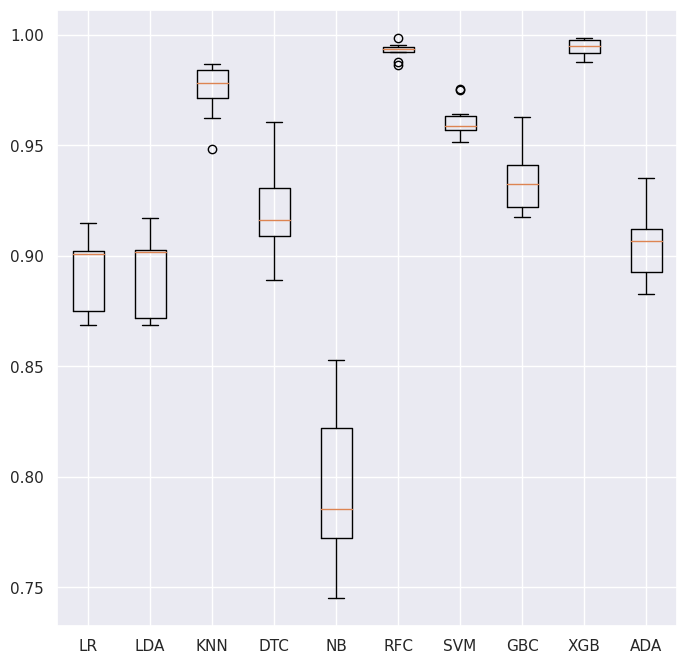

In [40]:
# Graphic of results 
def boxplots_algorithms(results, names):
    
    plt.figure(figsize=(8,8))
    plt.boxplot(results)
    plt.xticks(range(1,len(names)+1), names)
    plt.show()
boxplots_algorithms(results, names)

The algorithm showing a better performance is **Extreme Gradient Boosting (XGB)**

In [41]:
# Grid Search to find the best parameters
# Defines a range of values for different hyperparameters
param_grid = {
    'xgb__learning_rate': [0.01, 0.1, 0.2, 0.3],
    'xgb__max_depth': [3, 4, 5, 6],
    'xgb__subsample': [0.7, 0.8, 0.9, 1.0],
    'xgb__colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'xgb__n_estimators': [100, 200, 300, 400],
    'xgb__objective': ['binary:logistic']
}

# Creates an XGBClassifier object
xgb = XGBClassifier(random_state=seed, use_label_encoder=False, eval_metric='logloss')

# Creates a pipeline with SMOTE
pipeline = ImbPipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=seed)),
    ('xgb', xgb)
])

# Creates GridSearchCV object with ROC-AUC as scoring metric
grid_search = GridSearchCV(
    estimator=pipeline, 
    param_grid=param_grid, 
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=seed), 
    n_jobs=-1, 
    scoring='roc_auc', 
    verbose=2
)

# Fits the grid search to the data
grid_search.fit(X, y)

# Gets the best parameters and best score
best_parameters = grid_search.best_params_
best_score = grid_search.best_score_


Fitting 5 folds for each of 1024 candidates, totalling 5120 fits
[CV] END xgb__colsample_bytree=0.7, xgb__learning_rate=0.01, xgb__max_depth=3, xgb__n_estimators=100, xgb__objective=binary:logistic, xgb__subsample=0.7; total time=   0.7s
[CV] END xgb__colsample_bytree=0.7, xgb__learning_rate=0.01, xgb__max_depth=3, xgb__n_estimators=100, xgb__objective=binary:logistic, xgb__subsample=0.8; total time=   0.6s
[CV] END xgb__colsample_bytree=0.7, xgb__learning_rate=0.01, xgb__max_depth=3, xgb__n_estimators=100, xgb__objective=binary:logistic, xgb__subsample=0.9; total time=   0.6s
[CV] END xgb__colsample_bytree=0.7, xgb__learning_rate=0.01, xgb__max_depth=3, xgb__n_estimators=100, xgb__objective=binary:logistic, xgb__subsample=0.9; total time=   0.6s
[CV] END xgb__colsample_bytree=0.7, xgb__learning_rate=0.01, xgb__max_depth=3, xgb__n_estimators=100, xgb__objective=binary:logistic, xgb__subsample=1.0; total time=   0.6s
[CV] END xgb__colsample_bytree=0.7, xgb__learning_rate=0.01, xgb__max_

In [42]:
print(f"Best Parameters: {best_parameters}")
print()
print(f"Best Score: {best_score}")

Best Parameters: {'xgb__colsample_bytree': 0.8, 'xgb__learning_rate': 0.1, 'xgb__max_depth': 6, 'xgb__n_estimators': 400, 'xgb__objective': 'binary:logistic', 'xgb__subsample': 0.9}

Best Score: 0.990591320061915


In [43]:
# Splits the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

# Creates a pipeline with preprocessing, SMOTE, and XGBoost classifier
final_pipeline = ImbPipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=seed)),
    ('xgb', XGBClassifier(
        colsample_bytree=0.8,
        learning_rate=0.1,
        max_depth=6,
        n_estimators=400,
        objective='binary:logistic',
        subsample=0.9,
        random_state=seed,
        use_label_encoder=False,
        eval_metric='logloss'))
])

# Fits the pipeline to the training data
final_pipeline.fit(X_train, y_train)

# Makes predictions on the training and test data
y_pred_train = final_pipeline.predict(X_train)
y_pred_test = final_pipeline.predict(X_test)

# Calculates accuracy on training and test sets
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

# Prints the accuracies
print(f"Training Set Accuracy: {accuracy_train:.4f}")
print(f"Test Set Accuracy: {accuracy_test:.4f}")

Training Set Accuracy: 1.0000
Test Set Accuracy: 0.9689


Confusion Matrix:
 [[920  11]
 [ 24 171]]


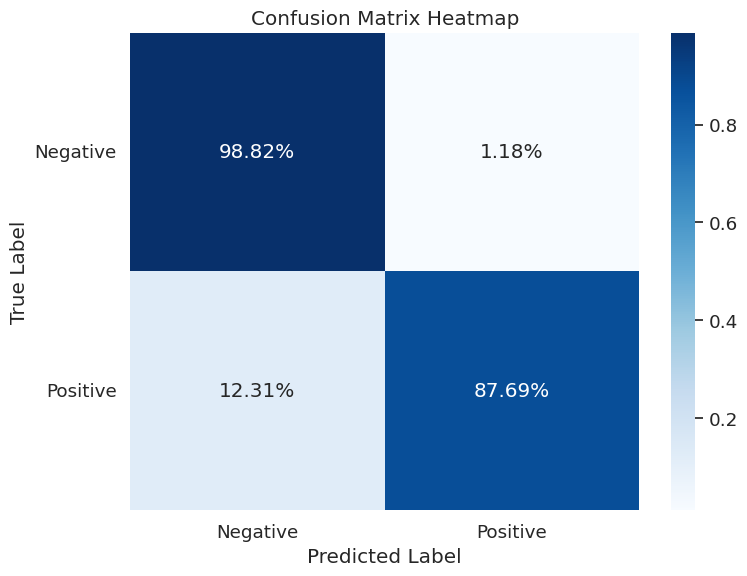

In [44]:
# Calculates the confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

# Prints the confusion matrix
print("Confusion Matrix:\n", cm)

# Normalizes the confusion matrix to show percentages
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Confusion Matrix labels 
labels = ['Negative', 'Positive']
categories = ['Negative', 'Positive']

# Heat Map with ratios
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(cm_normalized, annot=True, cmap='Blues', fmt='.2%', xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.xticks(ticks=np.arange(0.5, 2.5), labels=categories, rotation=0)
plt.yticks(ticks=np.arange(0.5, 2.5), labels=categories, rotation=0)
plt.tight_layout()
plt.show()

- **Specificity/Recall** or True Negative (TN): 98.82% of the cases were correctly predicted as not churning.  
- False Negative (FN): 12.31% of the cases were incorrectly predicted as not churning when they actually were (these are clients that churned but the model predicted they wouldn't).  
- **Sensitivity** or True Positive (TP): 87.69% of the cases were correctly predicted as churning.  
- False Positive (FP):  1.18% of the cases were incorrectly predicted as churning when they actually were not.  

**Implications for the company:**
- The model has a high True Negative rate, meaning it is very good at identifying customers who are not at risk of churning.  
- The True Positive rate is also quite high, indicating that the model is fairly effective at identifying customers who will churn. Since the main goal is to identify true positives, having 87.69% is good, but there is still room for improvement. 
- The False Negative rate is 12.31%, which is a concern since these are customers who the model predicts will stay but actually leave. This is particularly important for the business, as these are missed opportunities for intervention.  
- The False Positive rate is low, which is good because it means the model does not often incorrectly flag customers as at risk of churning when they are not. However, interventions on these customers may lead to unnecessary costs.  

In [45]:
# Get the feature importances from the xgb step in the pipeline
importances = final_pipeline.named_steps['xgb'].feature_importances_

#Creates a dictionary that maps the feature name to its importance
feature_importance_dict = dict(zip(X.columns, importances))

# Sorts features by importance (from highest to lowest)
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Prints the features and their importance
for feature, importance in sorted_features:
    print(f"Feature: {feature}, Importance: {importance}")

Feature: Tenure, Importance: 0.1170588806271553
Feature: HoursOnApp, Importance: 0.06897975504398346
Feature: PaymentMode, Importance: 0.03396850824356079
Feature: CashbackAmount, Importance: 0.028459327295422554
Feature: Gender, Importance: 0.027459926903247833
Feature: OrderCount, Importance: 0.025419510900974274
Feature: CouponUsed, Importance: 0.024939285591244698
Feature: LoginDevice, Importance: 0.02353382110595703
Feature: MainOrderCat, Importance: 0.023322414606809616
Feature: MaritalStatus, Importance: 0.022471804171800613
Feature: DaySinceLastOrder, Importance: 0.016703814268112183
Feature: Complain, Importance: 0.015588157810270786
Feature: SatisfactionScore, Importance: 0.014063980430364609
Feature: WarehouseToHome, Importance: 0.01284158043563366
Feature: CityTier, Importance: 0.011617186479270458
Feature: DevicesRegistered, Importance: 0.010453746654093266
Feature: NumberOfAddress, Importance: 0.010340624488890171
Feature: OrderAmountHikeFromlastYear, Importance: 0.006446

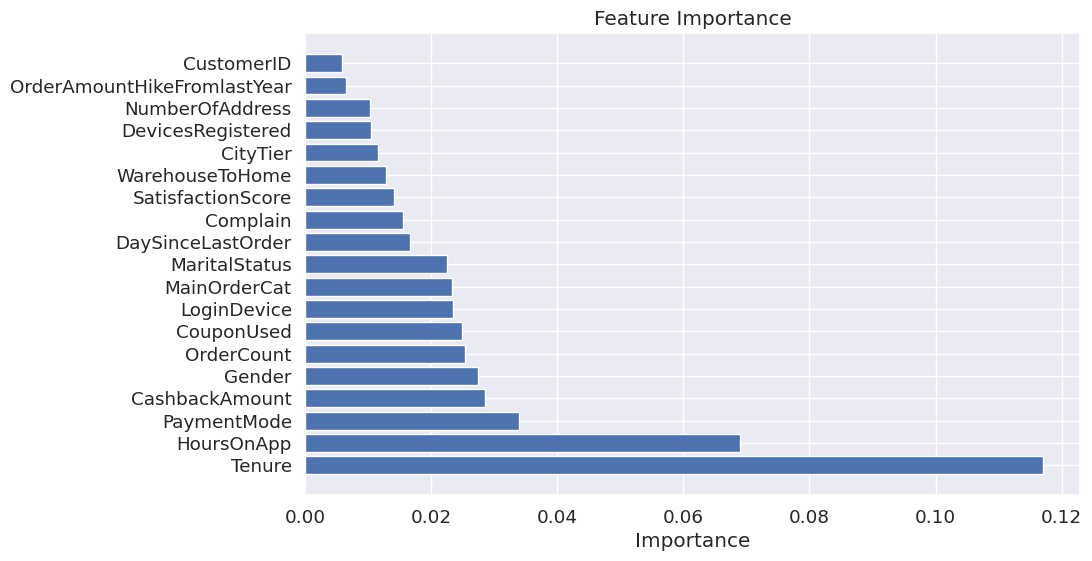

In [46]:
# Feature names and their importances sorted
sorted_feature_names, sorted_importances = zip(*sorted_features)

# Barplot
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_importances)), sorted_importances, align='center')
plt.yticks(range(len(sorted_importances)), sorted_feature_names)
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()

The feature importance scores provided by the XGBoost algorithm shows that tenure has the highest relative importance, which is particularly significant. This implies that this variable is a very strong predictor in the model, playing a key role in the decision-making process of the algorithm.

Although we have seen a weak positive linear relationship between hours on app and churn (see heatmap) "HoursOnApp" also shows a high relative importance, suggesting it's another key factor in predicting churn. Feature importance scores from models like XGBoost take into account the structure and rules learned within the context of the entire dataset, including interactions between features, and what might seem like a weak predictor in isolation, can become relevant when combined with other features.

The importance is "relative" and not "absolute," meaning that while Tenure is the most influential feature according to XGBoost model, it doesn't mean that the feature alone can predict churn with high accuracy. Also, the drop-off in importance after the top few features suggests that there are a few key features that are much more important than the others.

### **Automatic Model**

In [47]:
data_copy = data 

In [48]:
import h2o
from h2o.automl import H2OAutoML

# Initializes H2O cluster
h2o.init()

# Creates an H2OFrame from the DataFrame "data_copy"
h2o_df = h2o.H2OFrame(data_copy)

# Defines the features and target variable 
x = h2o_df.columns
y = "Churn"
x.remove(y)

# Ensures the target variable is interpreted as a factor by the model
h2o_df[y] = h2o_df[y].asfactor()

# Divides the data into train and test
train, test = h2o_df.split_frame(ratios=[0.8])

# # Initializes H2O cluster
aml = H2OAutoML(max_models=10, seed=1)

# Trains the model 
aml.train(x=x, y=y, training_frame=train)

# Visualization of models and metrics 
lb = aml.leaderboard
print(lb)
print('1--------------------------------1')

# Predictions on the test set
preds = aml.leader.predict(test)

# Performance metrics 
perf = aml.leader.model_performance(test)
print(perf)

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.21" 2023-10-17; OpenJDK Runtime Environment (build 11.0.21+9-post-Ubuntu-0ubuntu120.04); OpenJDK 64-Bit Server VM (build 11.0.21+9-post-Ubuntu-0ubuntu120.04, mixed mode, sharing)
  Starting server from /opt/conda/lib/python3.10/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpcwkhrom9
  JVM stdout: /tmp/tmpcwkhrom9/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpcwkhrom9/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,1 month and 14 days
H2O_cluster_name:,H2O_from_python_unknownUser_b1wpda
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,7.500 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
model_id                                                      auc    logloss     aucpr    mean_per_class_error      rmse        mse
StackedEnsemble_AllModels_1_AutoML_1_20240203_180606     0.976641   0.1314    0.927147               0.0854026  0.189891  0.0360585
StackedEnsemble_BestOfFamily_1_AutoML_1_20240203_180606  0.976424   0.131799  0.927609               0.0843734  0.190393  0.0362495
GBM_4_AutoML_1_20240203_180606                           0.975963   0.138798  0.926849               0.0823426  0.193221  0.0373345
GBM_3_AutoML_1_20240203_180606                           0.974078   0.144028  0.916983               0.0934208  0.197699  0.0390847
GBM_2_AutoML_1_20240203_180606                           0.972312   0.143782  0.916238               0.0896828  0.19613   0.0384668
DRF_1_AutoML_1_202

The winer model is the Stacked Ensemble model: 
- AUC (Area Under the Curve): 0.982775.  
- AUCPR (Area Under the Precision-Recall Curve): 0.949949.  

These metrics indicate that the Stacked Ensemble model performed very well on the test data, with high AUC and AUCPR values and low error rates (MSE, RMSE, LogLoss, Mean Per-Class Error).

In [49]:
confusion_matrix = perf.confusion_matrix()
print(confusion_matrix)

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.49028603248409813
       0    1    Error    Rate
-----  ---  ---  -------  -------------
0      981  13   0.0131   (13.0/994.0)
1      14   165  0.0782   (14.0/179.0)
Total  995  178  0.023    (27.0/1173.0)


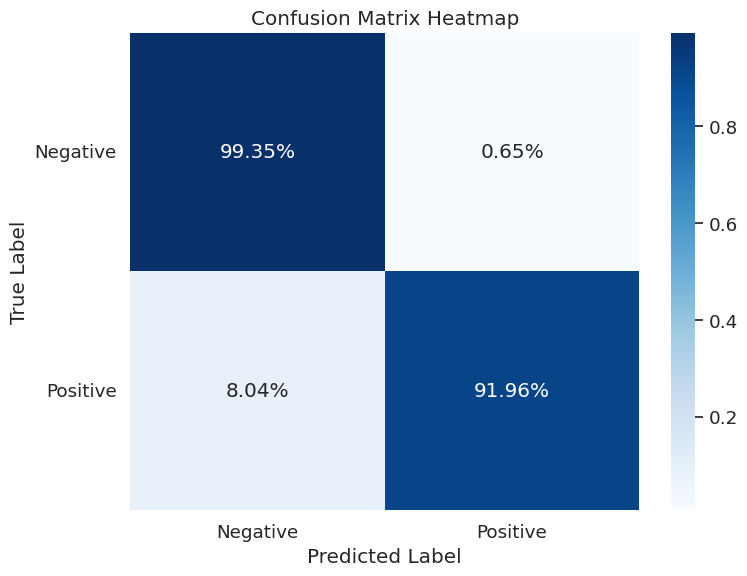

In [50]:
# Confusion Matrix
cm = np.array([[916, 6], [16, 183]])

# Prediction ratios
cm_sum = np.sum(cm, axis=1, keepdims=True)
cm_normalized = cm / cm_sum.astype(float)

# Confusion Matrix labels 
labels = ['Negative', 'Positive']
categories = ['Negative', 'Positive']

# Heat Map with ratios
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(cm_normalized, annot=True, cmap='Blues', fmt='.2%', xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.xticks(ticks=np.arange(0.5, 2.5), labels=categories, rotation=0)
plt.yticks(ticks=np.arange(0.5, 2.5), labels=categories, rotation=0)
plt.tight_layout()
plt.show()

- True Negative (Specificity/Recall): The automatic model has a slightly better true negative rate (99.35% vs. 98.82%), which suggests an improvement in correctly identifying customers who are not at risk of churning.  
- False Negative: The automatic model has a lower false negative rate (8.04% vs. 12.32%), meaning it has fewer instances where it incorrectly predicts a churning customer as not churning. This is a significant improvement, as it means the company is less likely to miss opportunities for intervention with customers at risk.  
- True Positive (Sensitivity): The automatic model also has a better true positive rate (91.96% vs. 87.69%), indicating it is more effective at correctly identifying customers who will churn. This improvement is crucial because it allows the company to focus retention efforts on the right customers.  
- False Positive: The automatic model has a slightly lower false positive rate (0.65% vs. 1.18%), which means it's making fewer errors in incorrectly predicting churn for loyal customers. This will help reduce unnecessary costs associated with targeting customers who do not need intervention.

**This automatic model shows advancements in all aspects of its predictive capabilities, which is favorable for the business as it should lead to more accurate targeting of customers at risk of churn, while also minimizing interventions on those who are not at risk.This model will be chosen.**

### **Conclusions** 

To enhance the commercial strategy of the e-commerce company, the data analysis suggests several targeted approaches:

1. **Product Strategy Focused on Popular Categories**: Given that laptop accessories are the most popular category, the company should intensify its focus here. This could involve expanding the range of products in this category, investing in targeted marketing campaigns, and ensuring competitive pricing and availability to capitalize on this demand.  
  

2. **Tailored Marketing for Key Demographics**: The predominant customer base of married males offers a clear direction for personalized marketing campaigns. By creating promotions and discounts for this demographic, the company can increase purchase frequency.


3. **Optimized Mobile User Experience**: With the majority of customers using mobile phones for app login, and although the app usage is consistent across devices, optimizing the app for mobile users is crucial. This includes a user-friendly interface, seamless navigation, and fast loading times. An excellent mobile experience can increase customer satisfaction and encourage repeat purchases.


4. **Expansion and Innovation in Market Reach**: The uniform success in diverse urban settings indicates effective market penetration strategies. To sustain growth, the company should consider innovative approaches to expand into new markets or product tiers. This could involve exploring untapped geographical areas or diversifying the product portfolio to cater to different customer segments.

5. **Promotion of Preferred Payment Methods**: The higher satisfaction associated with UPI and E-wallets should be leveraged. The company could negotiate better terms with these providers, offer incentives for using these methods, and potentially reevaluate the fee structures of less popular payment methods. This approach could enhance customer satisfaction and loyalty.

6. **Addressing Churn in Early Customer Lifecycle**: The analysis reveals that new customers are more prone to churn, and satisfaction levels are not reliable indicators of loyalty. Implementing strategies like loyalty programs, welcome offers, and initial engagement campaigns can help in retaining these new customers. Personalized communication and offers in the early stages of the customer lifecycle could significantly reduce churn rates.

Overall, the commercial strategy should be agile and data-driven, focusing on strengthening core areas of demand, enhancing customer experience, especially on mobile platforms, and addressing early-stage customer retention. By aligning marketing, product, and customer service strategies with these insights, the company can achieve sustained growth and improved customer loyalty. Furthermore, the integration of the Stacked Ensemble model significantly improves the company's ability to predict and manage customer churn. Its integration into the commercial strategy will lead to more effective customer retention, optimized resource allocation, improved operational efficiency, and ultimately, a stronger competitive position in the market.
